In [196]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import json
from pprint import pprint

import time
from ast import literal_eval

In [176]:
# Read the data
# data = pd.read_csv('top_500_artists_deduplicate.csv')
data = pd.read_csv('top_500_artists_deduplicate_genres.csv')
print(data.shape)
data.head()

(4576, 17)


,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,track_id,genres
0,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",Drake,2022-06-17,218364,91,0.529,0.000307,0.673,0.000002,0.0930,-4.711,0.1750,165.921,4,3F5CgOj3wFlRv51JsHbxhe,"['canadian hip hop', 'canadian pop', 'hip hop'..."
1,WAIT FOR U (feat. Drake & Tems),I NEVER LIKED YOU,Future,2022-04-29,189893,90,0.463,0.314000,0.642,0.000000,0.0686,-4.474,0.3400,83.389,4,59nOXPmaKlBfGMDeOVGrIK,"['atl hip hop', 'rap', 'southern hip hop', 'tr..."
2,One Dance,Views,Drake,2016-05-06,173986,86,0.792,0.007760,0.625,0.001800,0.3290,-5.609,0.0536,103.967,4,1zi7xx7UVEFkmKfv06H8x0,"['canadian hip hop', 'canadian pop', 'hip hop'..."
3,Knife Talk (with 21 Savage ft. Project Pat),Certified Lover Boy,Drake,2021-09-03,242965,85,0.849,0.063500,0.424,0.000000,0.0834,-9.579,0.3240,145.887,4,2BcMwX1MPV6ZHP4tUT9uq6,"['canadian hip hop', 'canadian pop', 'hip hop'..."
4,God's Plan,Scorpion,Drake,2018-06-29,198973,85,0.754,0.033200,0.449,0.000083,0.5520,-9.211,0.1090,77.169,4,6DCZcSspjsKoFjzjrWoCdn,"['canadian hip hop', 'canadian pop', 'hip hop'..."


In [177]:
data.genres=data.genres.apply(literal_eval)

In [178]:
data=data.explode('genres')

In [179]:
data.loc[:,"row_count"]=1

In [180]:
data.groupby("genres")["row_count"].count()

genres
a cappella          10
acid rock           10
acoustic cover      11
acoustic pop        11
adult standards     20
                    ..
virginia hip hop     1
west coast rap      74
world worship       10
worship             10
yacht rock          21
Name: row_count, Length: 480, dtype: int64

In [181]:
series = pd.value_counts(data.genres)

In [183]:
mask=(series/series.sum() * 100).lt(1)

In [184]:
len(series[mask].index)

460

In [185]:
len(series)

480

In [186]:
data["genres"]=np.where(data["genres"].isin(series[mask].index),"Other",data["genres"])

## Overall Song Coverage by Genres having more than 1% of share

In [187]:
len(data[data["genres"]!="Other"].name.unique())/len(data.name.unique())

0.7429791058189171

In [188]:
data["genres"].value_counts()

Other               8991
pop                 1631
dance pop           1012
rap                  746
rock                 487
hip hop              463
pop rap              449
edm                  364
post-teen pop        356
trap                 330
pop dance            291
trap latino          275
tropical house       257
reggaeton            239
latin pop            234
permanent wave       210
classic rock         209
r&b                  184
southern hip hop     181
melodic rap          179
electropop           177
Name: genres, dtype: int64

In [192]:
data[data["genres"]=="pop"].reset_index(drop=True)

In [202]:
num_features = ['length', 'danceability', 'acousticness', 'energy', 'instrumentalness','liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']

In [209]:
artist_pop = data.groupby('artist')['popularity'].agg(['mean', 'count'])

In [217]:
artist_pop['mean'][data['artist']]

artist
Drake         80.933333
Drake         80.933333
Drake         80.933333
Drake         80.933333
Drake         80.933333
                ...    
Bea Miller    60.000000
Aminé         66.250000
Aminé         66.250000
Aminé         66.250000
Aminé         66.250000
Name: mean, Length: 17278, dtype: float64

In [219]:
data['centralized_popularity'] = data['popularity'] - artist_pop['mean'][data['artist']].values

In [ ]:
data['mean_other_song_popularity'] = (artist_pop['mean'][data['artist']].values * artist_pop['count'][data['artist']].values - data['popularity'].values) / (artist_pop['count'][data['artist']].values - 1)

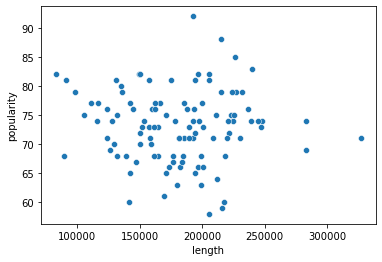

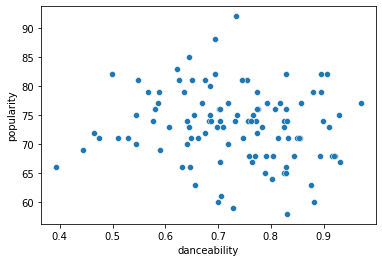

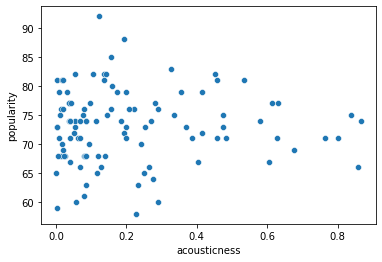

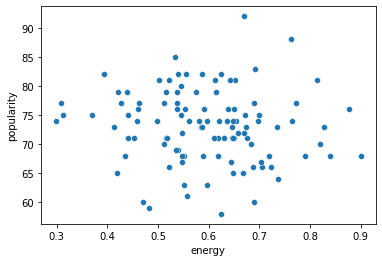

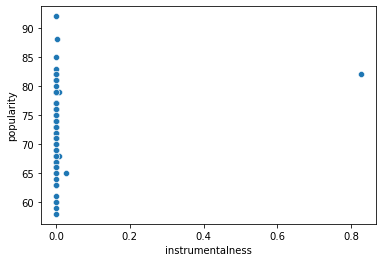

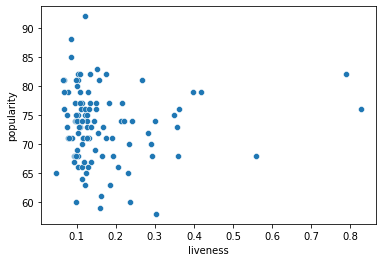

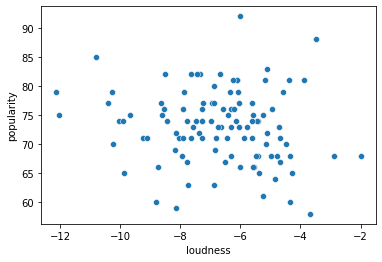

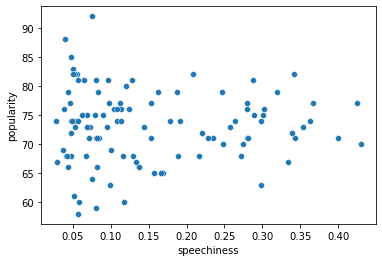

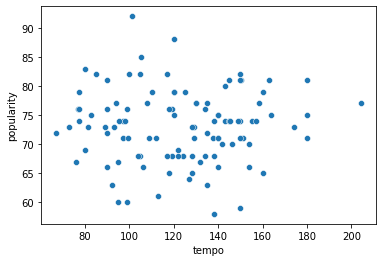

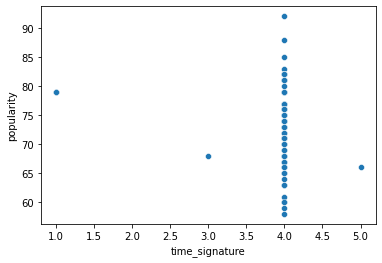

In [208]:
for col in num_features:
    sns.scatterplot(data=data[(data["genres"]=="melodic rap") & (data['release_date'] > "2019-01-01")],x=col,y="popularity")
    plt.show()